
<center><b>© Content is made available under the CC-BY-NC-ND 4.0 license. Christian Lopez, lopezbec@lafayette.edu<b><center>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/lopezbec/intro_python_notebooks/blob/master/Perceptrons_and_NN_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
         </table>
          <br><br></br>


#Implementing NN with PyTorch

This Notebook will give you an introduction on how to train a Neural Network using PyTorch.  

In this Notebook you will learn:

- How to implement a Perceptron
- How to implement multiple activation function and algorithmically get their derivatives
- How to build, train, and test a NN for image classification

Most of the notebooks we are going to be using are inspired from existing notebooks that are available online and are made free for educational purposes. Nonetheless, these notebooks should not be share without prior permission of the instructor. When working in an assignment always remember the [Student Code of Conduct](https://conduct.lafayette.edu/student-handbook/student-code-of-conduct/).

*The following sections were inspired and uses some of the code and text from the book:

Géron, A. (2019) 2nd Ed. Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. O'Reilly Media, Inc.( ISBN-10: 1491962291) [Chapter 10](https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb)


# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

import time

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
import logging

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL

#1- Perceptrons

The Perceptron is one of the simplest ANN architectures. It is based on a slightly different artificial neuron called a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU). The most common step function used in Perceptrons is the [Heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function), sometimes the [sign function](https://en.wikipedia.org/wiki/Sign_function) is used instead.

We can use the [Perceptron method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) from sklearn to implement a percentron for classification.

#### **Exercise**:

Read the documentation of the [Perceptron method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) from sklearn and train a clasification model (fit the parameter to max X to y).

**Hint**: Look at the "fit" method and pay attention to the dimensions of the arrays/inputs!!!!

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width

#Lets transform the data to a bynary clasification problem (Iris-Setosa or not)
y = (iris.target == 0).astype(int).reshape(-1,1)

per_clf = Perceptron(tol=1e-3, random_state=42)

###==== START CODE HERE ====### (≈ 1 lines of code)
y_pred = per_clf.fit(X,y)

###==== END CODE HERE ====###


y_pred = per_clf.predict([X[0,:]])
print("The predicted outcome is: ",y_pred[0], "and the ground truth is:", y[0,0])

The predicted outcome is:  1 and the ground truth is: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Expected Output**:
       
```
The predicted outcome is:  1 and the ground truth is: 1
```

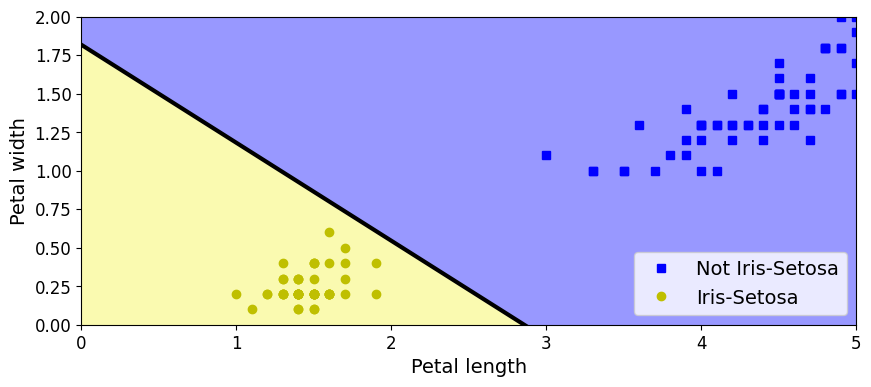

In [3]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]
y=y.flatten()

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

# 2- Activation functions

We have learned multiple activation functions, like:

$$sigmoid(z) = \frac{1}{1+e^{-z}}$$


$$tanh(z) = \frac{e^{z}- e^{-z}}{e^{z}+ e^{-z}}$$


$$ReLu(z) = max{(0,z)}$$


$$LeakyReLu(a,z) = max{(az,z)}$$

While we can mathematically get the derivatives of these activation functions, we can also algorithmically calculate the slope of g(z) at any point by taking a very small step to the right and left of z and calculating the slope of the function, like:

$$g'(z)=\frac{g(z+ \epsilon)-g(z- \epsilon)}{2 \times \epsilon}$$


#### **Exercise**:

Complete the following function declarations:

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def tanh(z):
###==== START CODE HERE ====### (≈ 1 lines of code)
    return (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))

###==== END CODE HERE ====###

def ReLu(z):
###==== START CODE HERE ====### (≈ 1 lines of code)
    return np.maximum(0,z)

###==== END CODE HERE ====###

def LeakyRelu(z,a=0.1):   #a=0.1 to make it easly to vizualize the differntece, a better values would be 0.001
###==== START CODE HERE ====### (≈ 1 lines of code)
    return np.maximum(a * z, z)

###==== END CODE HERE ====###

def derivative(f, z, eps=0.000001):
###==== START CODE HERE ====### (≈ 1 lines of code)
    return (f(z + eps) - f(z - eps))/(2 * eps)

###==== END CODE HERE ====###

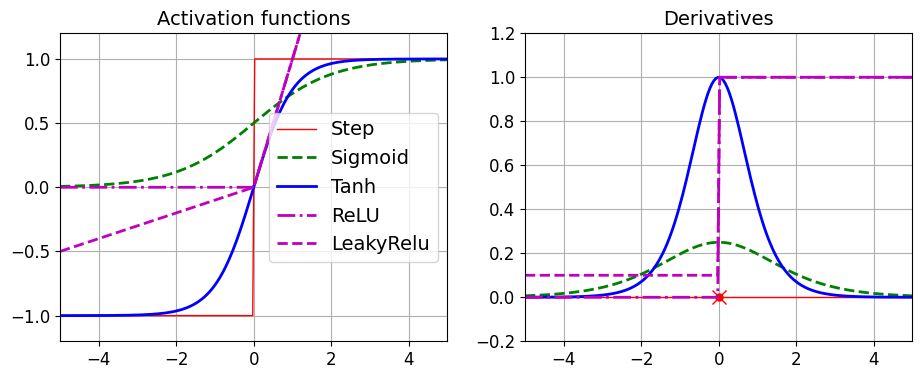

In [5]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, ReLu(z), "m-.", linewidth=2, label="ReLU")
plt.plot(z, LeakyRelu(z), "m--", linewidth=2, label="LeakyRelu")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(ReLu, z), "m-.", linewidth=2, label="ReLU")
plt.plot(z, derivative(LeakyRelu, z), "m--", linewidth=2, label="LeakyRelu")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

# 3- Building an NN with PyTorch for Image Classification

### 3.1- Importing PyTorch

In [6]:
import torch
import torch.nn as nn
!pip install torchsummary torchviz graphviz
from torchsummary import summary
from torchviz import make_dot
from IPython.display import Image
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import copy

In [7]:
torch.__version__

'2.6.0+cu124'

### 3.2- The Dataset

Let's start by loading the fashion MNIST dataset. PyTorch has a number of functions to load popular datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [8]:
# Transform
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts to [0,1] range
])

# Load datasets
train_dataset = datasets.FashionMNIST(root='.', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='.', train=False, download=True, transform=transform)

# Access raw data if needed like X_train_full, y_train_full:
X_train_full = train_dataset.data      # shape: [60000, 28, 28]
y_train_full = train_dataset.targets   # shape: [60000]
X_test = test_dataset.data             # shape: [10000, 28, 28]
y_test = test_dataset.targets          # shape: [10000]

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [9]:
X_train_full.shape

torch.Size([60000, 28, 28])

Each pixel intensity is represented as a byte (0 to 255) since in a 8 bits we can get [total number of 256 possible combinations](https://user.eng.umd.edu/~nsw/chbe250/number.htm):

In [10]:
X_train_full.dtype   #8-bit unsigned integer =uint8

torch.uint8

#### 3.2.1- Splitting the dataset

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [11]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

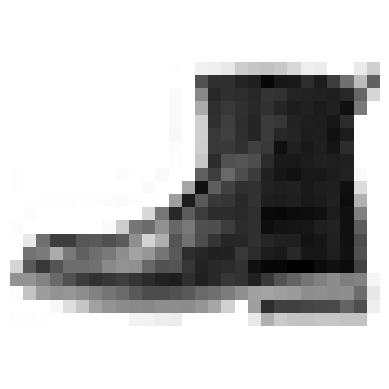

In [12]:
plt.imshow(X_train[3], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [13]:
y_train

tensor([4, 0, 7,  ..., 3, 0, 5])

Here are the corresponding class names:

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the 4th image in the training set is a 'Ankle boot':

In [15]:
class_names[y_train[4]]

'Ankle boot'

In [16]:
print( "The training set shape is: " , X_train.shape)
print( "The validation set shape is: ", X_valid.shape)
print( "The testing set shape is: ", X_test.shape)

The training set shape is:  torch.Size([55000, 28, 28])
The validation set shape is:  torch.Size([5000, 28, 28])
The testing set shape is:  torch.Size([10000, 28, 28])


#### 3.2.2.- Visualizing the Dataset

Let's take a look at a sample of the images in the dataset:

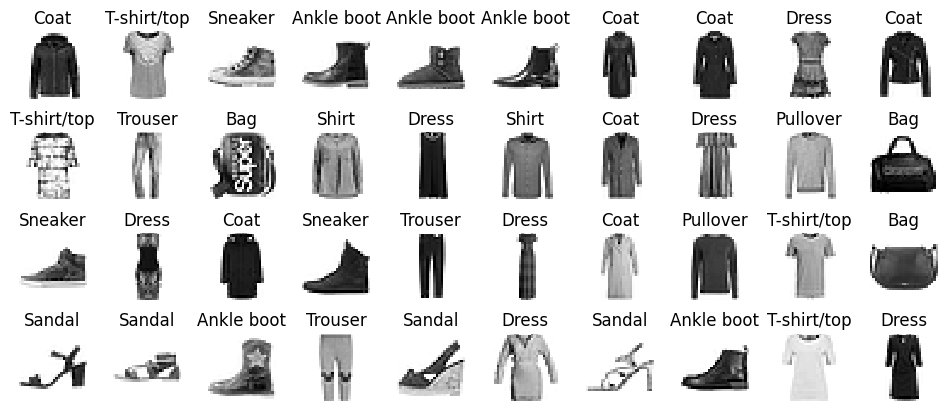

In [17]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 3.3- Setting up the NN model with PyTorch

To ensure reproducibility we need to set the random seeds

In [18]:
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)  # For GPU reproducibility

Now we need to specify our Neural Network architecture. We need to specify:
* The number of layers in our network
* The number of neurons per layer
* The activation function of our layers

We can achieve all this by using `torch.nn`. There are multiple types of layer we can use. For this architecture we will have:

**1)** The input layer will be a nn.Flatten in order to "flatten” a image from a matrix to a vector.

**2)** The 1st hidden layer will be a fully/densely connected layer with 300 neurons and ReLu activation function using `nn.Linear(28 * 28, 300)` and `nn.ReLU()`

**3)** The 2nd hidden layer will be another fully/densely connected layer with 100 neuron and ReLu activation function using `nn.Linear(300, 100)` and `nn.ReLU()`

**4)** The last layer, our output layer, will be another fully/densely connected layer but with just 10 layers since we have 10 classes. Also, since we have a multiclass classification problem, we will use a softmax activation function.


In [19]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 300),
    nn.ReLU(),
    nn.Linear(300, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
    nn.Softmax(dim=1)  # softmax over class dimension
)

In [20]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=300, bias=True)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=100, bias=True)
  (4): ReLU()
  (5): Linear(in_features=100, out_features=10, bias=True)
  (6): Softmax(dim=1)
)


We can get a summary of our NN architecture

In [21]:
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 300]         235,500
              ReLU-3                  [-1, 300]               0
            Linear-4                  [-1, 100]          30,100
              ReLU-5                  [-1, 100]               0
            Linear-6                   [-1, 10]           1,010
           Softmax-7                   [-1, 10]               0
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.02
Estimated Total Size (MB): 1.03
----------------------------------------------------------------


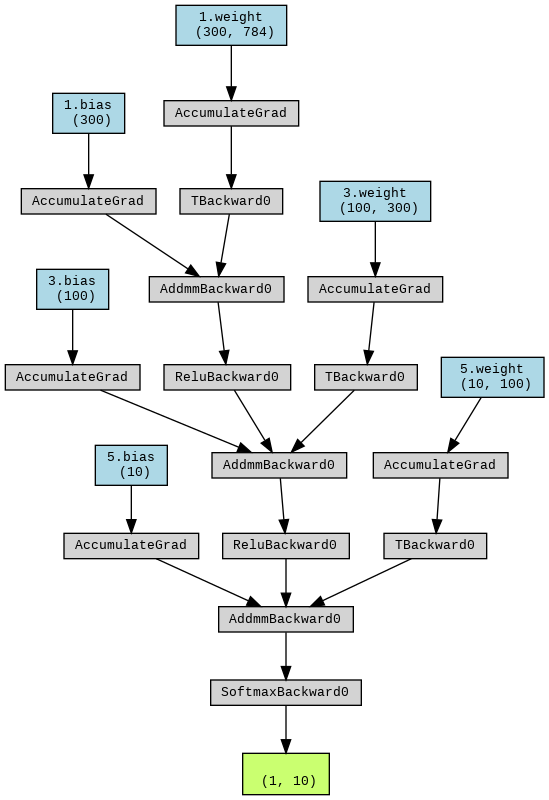

In [22]:
x = torch.randn(1, 1, 28, 28)  # batch size 1, grayscale image
y = model(x)
make_dot(y, params=dict(model.named_parameters())).render("model", format="png")
Image("model.png")

This summary show that:

* $n^{[0]}$= 784  (inputs)
* $n^{[1]}$= 300
* $n^{[2]}$= 100
* $n^{[3]}$= 10 (outputs)

Hence, we have a total of 266,610 model parameters that need to be trained. Thankfully, PyTorch already randomly initialize the weights and initialized to zero our bias terms.

In [23]:
hidden1 = model[1]
weights = hidden1.weight.data
biases = hidden1.bias.data

In [24]:
weights

tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0283,  0.0160, -0.0331,  ..., -0.0214, -0.0285,  0.0025],
        [ 0.0149, -0.0222,  0.0158,  ...,  0.0002,  0.0009,  0.0010],
        [ 0.0060, -0.0062, -0.0113,  ...,  0.0222,  0.0135, -0.0049]])

In [25]:
biases

tensor([ 0.0206,  0.0060,  0.0232, -0.0270, -0.0098, -0.0182, -0.0304, -0.0039,
         0.0041,  0.0309, -0.0117,  0.0326,  0.0127, -0.0348, -0.0126, -0.0341,
        -0.0169, -0.0226, -0.0347,  0.0201,  0.0293, -0.0016, -0.0167,  0.0077,
         0.0332, -0.0142, -0.0279, -0.0221,  0.0331, -0.0055, -0.0130,  0.0019,
        -0.0034, -0.0280,  0.0010,  0.0137,  0.0272,  0.0116, -0.0218,  0.0247,
         0.0040, -0.0131, -0.0045, -0.0003, -0.0321, -0.0075,  0.0031, -0.0330,
         0.0140, -0.0321, -0.0045, -0.0035,  0.0332,  0.0188, -0.0277, -0.0120,
        -0.0268, -0.0152, -0.0327, -0.0103,  0.0282,  0.0170,  0.0344, -0.0027,
        -0.0096, -0.0202, -0.0189, -0.0084, -0.0194, -0.0327, -0.0287, -0.0225,
        -0.0017, -0.0080, -0.0102, -0.0216,  0.0171,  0.0219, -0.0348,  0.0229,
        -0.0177,  0.0216, -0.0281,  0.0350,  0.0019, -0.0181, -0.0004, -0.0327,
         0.0191,  0.0283, -0.0205, -0.0212,  0.0040,  0.0131, -0.0218,  0.0054,
         0.0006,  0.0229,  0.0301, -0.01

Just in case you want to look at the model's parameters, you need to be aware that in PyTorch the shape/dimension of $W^{[l]}$ is actually $(n^{[l-1]}, n^{[l]})$ and $b^{[l]}$ is  $(n^{[l]},)$.

In [26]:
weights.shape

torch.Size([300, 784])

In [27]:
biases.shape

torch.Size([300])

## 3.4- Training our NN model with PyTorch

Since this is a multiclass classification problem we would use the Cross Entropy loss function (see Eq. 4-22) ; however, for our evaluation metric we would like to use [accuracy]( https://developers.google.com/machine-learning/crash-course/classification/accuracy) since we would like to know the percentage of correctly classified instances. Lastly, since we have so many parameters, lets use  Stochastic gradient descent (sgd) optimizer to get to a “good” solution fast.

In [28]:
# Loss function: sparse categorical crossentropy → CrossEntropyLoss
loss_fn = nn.CrossEntropyLoss()

# Optimizer: SGD
optimizer = optim.SGD(model.parameters(), lr=0.01)

#Lets save our initial model weights so we can "reset" the traning latter
Wsave = copy.deepcopy(model.state_dict())

Now we can train our model, and fit our parameters to the training set. We also pass the validation set just for evaluation purposes (no training is done with the validation set).

For now, lets do 1 iteration (`epochs=1`) of my SGD going over the whole dataset (`batch_size=1`).

This will take a while to run...

In [29]:
import time
from torch.utils.data import TensorDataset, DataLoader

# Reset weights
model.load_state_dict(Wsave)

# Prepare tensors
X_train_tensor = X_train_full[:50000].float().unsqueeze(1) / 255.0
y_train_tensor = y_train_full[:50000]
X_valid_tensor = X_train_full[50000:].float().unsqueeze(1) / 255.0
y_valid_tensor = y_train_full[50000:]

# DataLoaders
batch_size = 1
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(TensorDataset(X_valid_tensor, y_valid_tensor), batch_size=batch_size)

# History dict like Keras
history = {
    'loss': [],
    'val_loss': [],
    'accuracy': [],
    'val_accuracy': [],
    'params': {
        'verbose': 1,
        'epochs': 1,
        'steps': len(train_loader)
    }
}

# Training
tic = time.process_time()
model.train()
for epoch in range(history['params']['epochs']):
    epoch_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        correct += (y_pred.argmax(1) == y_batch).sum().item()
        total += y_batch.size(0)

    avg_loss = epoch_loss / len(train_loader)
    accuracy = correct / total

    # Validation
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for X_batch, y_batch in valid_loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            val_loss += loss.item()
            val_correct += (y_pred.argmax(1) == y_batch).sum().item()
            val_total += y_batch.size(0)
    model.train()

    val_avg_loss = val_loss / len(valid_loader)
    val_accuracy = val_correct / val_total

    # Store history
    history['loss'].append(avg_loss)
    history['accuracy'].append(accuracy)
    history['val_loss'].append(val_avg_loss)
    history['val_accuracy'].append(val_accuracy)

    # Print like Keras verbose=1
    if history['params']['verbose']:
        print(f"Epoch {epoch+1}/{history['params']['epochs']}")
        print(f"loss: {avg_loss:.4f} - accuracy: {accuracy:.4f} - val_loss: {val_avg_loss:.4f} - val_accuracy: {val_accuracy:.4f}")

toc = time.process_time()
print("Time to train the model:" + str((toc - tic)) + "s")


Epoch 1/1
loss: 1.7588 - accuracy: 0.7149 - val_loss: 1.6801 - val_accuracy: 0.7825
Time to train the model:64.58112443899999s


If you did not commented out the `model.set_weights(Wsave)` and is the 1st time you run this code cell, from the printout you will see that the model gets a training accuracy of ~81% and validation accuracy of ~80%. Every time we run the `.fit` method of the model, we continue to train the model

Let’s see if we can get a better performance by training over more iterations, but in batches now (like BGD), so let’s "reset" our model.

This will take even longer to run.


In [30]:
# Reset weights
model.load_state_dict(Wsave)

# Prepare data (split train/val)
X_train_tensor = X_train_full[:50000].float().unsqueeze(1) / 255.0
y_train_tensor = y_train_full[:50000]
X_valid_tensor = X_train_full[50000:].float().unsqueeze(1) / 255.0
y_valid_tensor = y_train_full[50000:]

# Dataloaders
batch_size = 50
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(TensorDataset(X_valid_tensor, y_valid_tensor), batch_size=batch_size)

# Keras-style history dict with params
history = {
    'loss': [],
    'val_loss': [],
    'accuracy': [],
    'val_accuracy': [],
    'params': {
        'verbose': 1,
        'epochs': 30,
        'steps': len(train_loader)
    }
}

# Training loop
tic = time.process_time()
for epoch in range(history['params']['epochs']):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        correct += (y_pred.argmax(1) == y_batch).sum().item()
        total += y_batch.size(0)

    avg_loss = running_loss / len(train_loader)
    train_accuracy = correct / total

    # Validation
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for X_batch, y_batch in valid_loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            val_loss += loss.item()
            val_correct += (y_pred.argmax(1) == y_batch).sum().item()
            val_total += y_batch.size(0)

    avg_val_loss = val_loss / len(valid_loader)
    val_accuracy = val_correct / val_total

    # Store history
    history['loss'].append(avg_loss)
    history['accuracy'].append(train_accuracy)
    history['val_loss'].append(avg_val_loss)
    history['val_accuracy'].append(val_accuracy)

    # Print like Keras verbose=1
    if history['params']['verbose']:
        print(f"Epoch {epoch+1}/{history['params']['epochs']}")
        print(f"loss: {avg_loss:.4f} - accuracy: {train_accuracy:.4f} - val_loss: {avg_val_loss:.4f} - val_accuracy: {val_accuracy:.4f}")

toc = time.process_time()
print("Time to train the model:" + str((toc - tic)) + "s")


Epoch 1/30
loss: 2.2985 - accuracy: 0.2539 - val_loss: 2.2927 - val_accuracy: 0.3699
Epoch 2/30
loss: 2.2808 - accuracy: 0.3657 - val_loss: 2.2590 - val_accuracy: 0.3715
Epoch 3/30
loss: 2.1784 - accuracy: 0.3740 - val_loss: 2.0654 - val_accuracy: 0.5120
Epoch 4/30
loss: 1.9835 - accuracy: 0.5450 - val_loss: 1.9336 - val_accuracy: 0.5520
Epoch 5/30
loss: 1.8885 - accuracy: 0.6162 - val_loss: 1.8607 - val_accuracy: 0.6292
Epoch 6/30
loss: 1.8459 - accuracy: 0.6325 - val_loss: 1.8347 - val_accuracy: 0.6407
Epoch 7/30
loss: 1.8245 - accuracy: 0.6560 - val_loss: 1.8158 - val_accuracy: 0.6755
Epoch 8/30
loss: 1.8046 - accuracy: 0.6893 - val_loss: 1.7970 - val_accuracy: 0.6966
Epoch 9/30
loss: 1.7865 - accuracy: 0.7061 - val_loss: 1.7818 - val_accuracy: 0.7063
Epoch 10/30
loss: 1.7729 - accuracy: 0.7135 - val_loss: 1.7712 - val_accuracy: 0.7107
Epoch 11/30
loss: 1.7632 - accuracy: 0.7184 - val_loss: 1.7636 - val_accuracy: 0.7143
Epoch 12/30
loss: 1.7562 - accuracy: 0.7209 - val_loss: 1.7580 

We got a better accuracy now!! but it took so long, in the next notebook we will learn how to train out model using the free GPU of Google Colab.

It is important to understand the difference between epochs and how `barch_size` related to the step of our optimizer. As you can see bellow, in our last training, we had `epochs=30` and `steps=1100`.

An Epoch is an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation. Hence, setting up the number of epochs is like setting up the number of times we want PyTorch to save the loss and performance metric of my training and validation set. While in each epoch, we go over several steps updating our parameters (as you can see from the update bar), but only calculate loss and performance of validation set at the end of each epoch.

The  number of steps are given by the `m/batch size`. We could also use the `steps_per_epoch` to directly set this value.  



In [31]:
history['params']

{'verbose': 1, 'epochs': 30, 'steps': 1000}

We can clearly see that our model is converging just fine.

## 3.5- Using our NN for prediction

Now we can use our trained model and testing set to get an estimate of how our model would perform if deployed.

Remember, that you should never look at the testing set performance and re-training your model, since you will be **OVERFITTING TO THE TEST SET!!!**... hence you would not have any data to reliably estimate of how our model would perform if deployed.


In [32]:
from torch.utils.data import TensorDataset, DataLoader

# Prepare test data
X_test_tensor = X_test.float().unsqueeze(1) / 255.0  # shape: [10000, 1, 28, 28]
y_test_tensor = y_test

test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=50)

# Evaluate
model.eval()
test_loss = 0
correct = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        test_loss += loss_fn(y_pred, y_batch).item()
        correct += (y_pred.argmax(1) == y_batch).sum().item()

# Compute average loss and accuracy
test_loss /= len(test_loader)
accuracy = correct / len(X_test_tensor)

print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")


Test loss: 2.3263
Test accuracy: 0.1000


We can see that even to get a prediction out of our model, it takes some time. This is a metric that in some cases might be as valuable as accuracy or performance.

In [33]:
# Select first 3 test samples
X_new = X_test[:3].float().unsqueeze(1) / 255.0  # shape: [3, 1, 28, 28]

# Predict probabilities
model.eval()
with torch.no_grad():
    y_proba = model(X_new)

# Round probabilities to 2 decimal places
y_proba_rounded = torch.round(y_proba * 100) / 100

print(y_proba_rounded)


tensor([[0.0200, 0.0100, 0.0600, 0.0500, 0.0300, 0.7100, 0.0300, 0.0300, 0.0400,
         0.0100],
        [0.0200, 0.0100, 0.0700, 0.0500, 0.0300, 0.7100, 0.0300, 0.0300, 0.0400,
         0.0100],
        [0.0200, 0.0100, 0.0700, 0.0500, 0.0400, 0.6900, 0.0300, 0.0300, 0.0400,
         0.0100]])


Since the output later of this NN model has 10 artificial neuron, one for each of the class in my dataset, as output I will get a vector of probabilities.

In [34]:
# Ensure model is in evaluation mode and input is normalized
model.eval()
X_new = X_test[:3].float().unsqueeze(1) / 255.0

with torch.no_grad():
    y_prob = model(X_new)

# Get predicted class indices
y_classes = y_prob.argmax(dim=-1)
print(y_classes)


tensor([5, 5, 5])


In [35]:
np.array(class_names)[y_classes]

array(['Sandal', 'Sandal', 'Sandal'], dtype='<U11')

In [36]:
y_new = y_test[:3]
y_new

tensor([9, 2, 1])

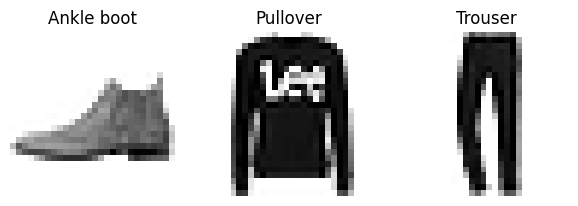

In [37]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    # Squeeze the image tensor to remove the channel dimension before displaying
    plt.imshow(image.squeeze(0), cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


# 4- Building your own NN

In [38]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split
import pandas as pd

# Transform: convert to tensor (values in [0, 1])
transform = transforms.ToTensor()

# Load MNIST dataset
mnist_train = datasets.MNIST(root='.', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='.', train=False, download=True, transform=transform)

# Split training into train and validation sets (5000 validation, 55000 training)
X_train, X_valid = random_split(mnist_train, [55000, 5000], generator=torch.Generator().manual_seed(42))

# Keep test set as-is
X_test = mnist_test

# Class names
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]


In [39]:
print(image.squeeze().shape)  # torch.Size([28, 28])

torch.Size([28, 28])


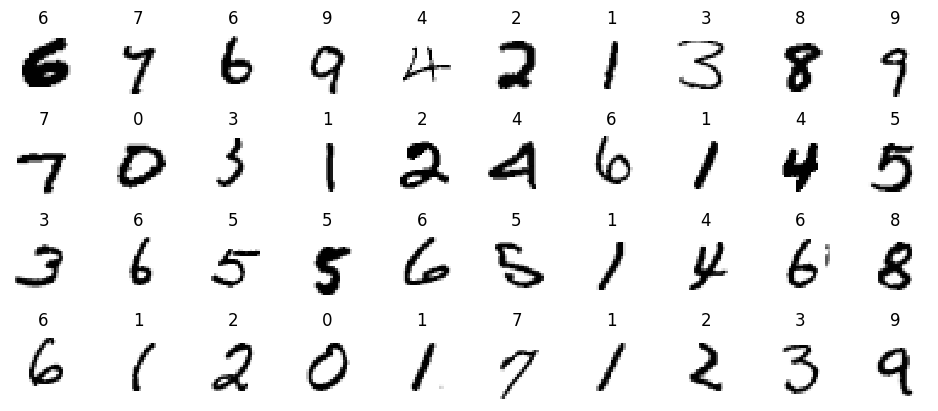

In [40]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        # Access the image data from the Subset using [0]
        image, label = X_train[index]
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image.squeeze(), cmap="binary", interpolation="nearest") # Squeeze to remove channel dim if necessary
        plt.axis('off')
        plt.title(class_names[label], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Hyperparameter Tuning**

In [41]:
# Hyperparameter Tuning (Quick evaluation on val set)
import torch.nn.functional as F

def build_model(dropout_rate):
    return nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 100),
        nn.ReLU(),
        nn.Dropout(dropout_rate),
        nn.Linear(100, 10),
        nn.Softmax(dim=1)
    )

tuning_results = []
lr_values = [0.01, 0.05]
dropout_values = [0.2, 0.5]

for lr in lr_values:
    for dropout in dropout_values:
        print(f"Testing lr={lr}, dropout={dropout}")

        model = build_model(dropout)
        optimizer = optim.SGD(model.parameters(), lr=lr)

        # Train briefly (3 epochs)
        for epoch in range(3):
            model.train()
            for X_batch, y_batch in train_loader:
                optimizer.zero_grad()
                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)
                loss.backward()
                optimizer.step()

        # Validation accuracy
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for X_batch, y_batch in valid_loader:
                y_pred = model(X_batch)
                correct += (y_pred.argmax(1) == y_batch).sum().item()
                total += y_batch.size(0)
        accuracy = correct / total
        tuning_results.append((lr, dropout, accuracy))

# Display results
tuning_results.sort(key=lambda x: x[2], reverse=True)
best_lr, best_dropout, best_acc = tuning_results[0]
print(f"\nBest config: lr={best_lr}, dropout={best_dropout}, val_acc={best_acc:.4f}")


Testing lr=0.01, dropout=0.2
Testing lr=0.01, dropout=0.5
Testing lr=0.05, dropout=0.2
Testing lr=0.05, dropout=0.5

Best config: lr=0.05, dropout=0.5, val_acc=0.7729


#### **Exercise**:

Now use the [MNIST digits]( http://yann.lecun.com/exdb/mnist/) dataset to train a NN model.  Make sure to:
-	Perform any data preprocessing if necessary
-	Make sure your model does not take more than 5mins to train (using CPU). See the training time at the end.
-	Make sure your results are reproducible
-	Make sure to plot the Loss and performance metric of your model


Epoch 1/5
loss: 2.2931 - accuracy: 0.2101 - val_loss: 2.2800 - val_accuracy: 0.3354
Epoch 2/5
loss: 2.2430 - accuracy: 0.3633 - val_loss: 2.1794 - val_accuracy: 0.3880
Epoch 3/5
loss: 2.1031 - accuracy: 0.4932 - val_loss: 1.9965 - val_accuracy: 0.6388
Epoch 4/5
loss: 1.9451 - accuracy: 0.6249 - val_loss: 1.8650 - val_accuracy: 0.6594
Epoch 5/5
loss: 1.8683 - accuracy: 0.6512 - val_loss: 1.8094 - val_accuracy: 0.7232


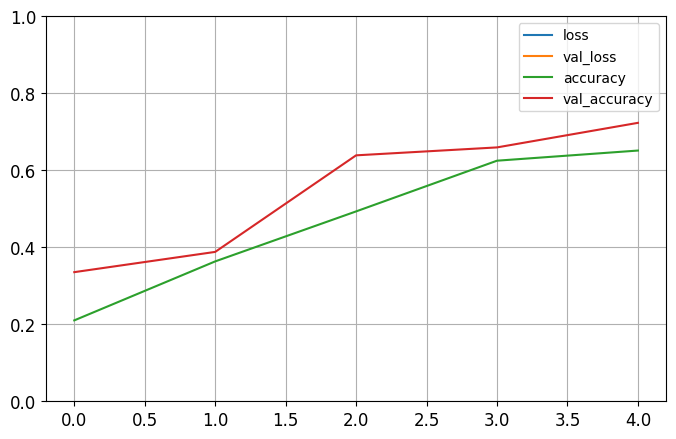

Time to train the model:10.737135324000008s


In [42]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

# Start timing
tic = time.process_time()

# Set seeds
torch.manual_seed(42)
np.random.seed(42)

# Load raw MNIST data as NumPy arrays
mnist = datasets.MNIST(root='.', train=True, download=True)
X_full = mnist.data.numpy()
y_full = mnist.targets.numpy()

mnist_test = datasets.MNIST(root='.', train=False, download=True)
X_test = mnist_test.data.numpy()
y_test = mnist_test.targets.numpy()

# Normalize (match X = X / 255. behavior)
X_full = X_full.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

# Train/validation split
X_valid, X_train = X_full[:5000], X_full[5000:]
y_valid, y_train = y_full[:5000], y_full[5000:]

# Convert to PyTorch tensors and add channel dimension
X_train_tensor = torch.tensor(X_train).unsqueeze(1)  # shape: [N, 1, 28, 28]
X_valid_tensor = torch.tensor(X_valid).unsqueeze(1)
X_test_tensor = torch.tensor(X_test).unsqueeze(1)

y_train_tensor = torch.tensor(y_train)
y_valid_tensor = torch.tensor(y_valid)
y_test_tensor = torch.tensor(y_test)

# DataLoaders
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
valid_loader = DataLoader(TensorDataset(X_valid_tensor, y_valid_tensor), batch_size=64)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=64)

# Define model with dropout
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 100),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(100, 10),
    nn.Softmax(dim=1)
)

# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# History tracking
history = {
    'loss': [],
    'val_loss': [],
    'accuracy': [],
    'val_accuracy': [],
    'params': {
        'epochs': 5,
        'batch_size': 64,
        'verbose': 1
    }
}

# for early stopping
best_val_loss = float('inf')
patience = 3
epochs_without_improvement = 0

# Training loop
for epoch in range(history['params']['epochs']):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (y_pred.argmax(1) == y_batch).sum().item()
        total += y_batch.size(0)

    avg_loss = total_loss / len(train_loader)
    accuracy = correct / total

    # Validation
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for X_batch, y_batch in valid_loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            val_loss += loss.item()
            val_correct += (y_pred.argmax(1) == y_batch).sum().item()
            val_total += y_batch.size(0)

    avg_val_loss = val_loss / len(valid_loader)
    val_accuracy = val_correct / val_total

    # Store history
    history['loss'].append(avg_loss)
    history['accuracy'].append(accuracy)
    history['val_loss'].append(avg_val_loss)
    history['val_accuracy'].append(val_accuracy)

    # Print progress
    if history['params']['verbose']:
        print(f"Epoch {epoch+1}/{history['params']['epochs']}")
        print(f"loss: {avg_loss:.4f} - accuracy: {accuracy:.4f} - val_loss: {avg_val_loss:.4f} - val_accuracy: {val_accuracy:.4f}")

    # add to tensorboard
    writer.add_scalar('Loss/train', avg_loss, epoch)
    writer.add_scalar('Accuracy/train', accuracy, epoch)
    writer.add_scalar('Loss/val', avg_val_loss, epoch)
    writer.add_scalar('Accuracy/val', val_accuracy, epoch)

    #save checkpoint
    if val_loss < best_val_loss:
        torch.save(model.state_dict(), "best_model.pth")

    #early stoppping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        torch.save(model.state_dict(), "best_model.pth")
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print("Early stopping triggered.")
            break

# Plot results
df = pd.DataFrame({
    'loss': history['loss'],
    'val_loss': history['val_loss'],
    'accuracy': history['accuracy'],
    'val_accuracy': history['val_accuracy']
})
df.plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)
plt.show()

# End timing
toc = time.process_time()
total_time = toc - tic
print("Time to train the model:" + str(total_time) + "s")
writer.close()

#### 4.1- Model’s Performance

In [43]:
# load saved model from training
model.load_state_dict(torch.load("best_model.pth"))

# Ensure model is in evaluation mode
model.eval()

test_loss = 0
test_correct = 0
test_total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:  # test_loader was defined earlier
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        test_loss += loss.item()
        test_correct += (y_pred.argmax(1) == y_batch).sum().item()
        test_total += y_batch.size(0)

avg_test_loss = test_loss / len(test_loader)
test_accuracy = test_correct / test_total

print(f"Test loss: {avg_test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")


Test loss: 1.8124
Test accuracy: 0.7221


In [44]:
y_proba

tensor([[0.0212, 0.0133, 0.0617, 0.0482, 0.0334, 0.7108, 0.0312, 0.0305, 0.0378,
         0.0120],
        [0.0210, 0.0122, 0.0666, 0.0484, 0.0326, 0.7141, 0.0304, 0.0255, 0.0386,
         0.0105],
        [0.0230, 0.0149, 0.0657, 0.0522, 0.0353, 0.6949, 0.0330, 0.0308, 0.0383,
         0.0119]])

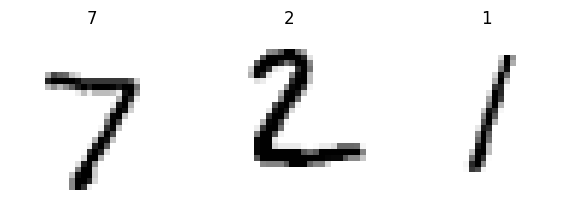

In [45]:
import matplotlib.pyplot as plt

# Select first 3 test samples
# Use X_test_tensor (PyTorch tensor) instead of X_test (NumPy array)
X_new = torch.stack([X_test_tensor[i][0] for i in range(3)])  # shape: [3, 1, 28, 28]

# Predict probabilities
model.eval()
with torch.no_grad():
    y_proba = model(X_new)

# Get predicted class labels
y_pred = y_proba.argmax(dim=1)

# Plot setup (actual images plotted next if needed)
plt.figure(figsize=(7.2, 2.4))


y_new = y_test[:3]

for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    # Squeeze the image tensor to remove the channel dimension before displaying
    plt.imshow(image.squeeze(0), cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

###### **DO NOT DELETE NOR MODIFY THESE CODE CELLS**


In [46]:

# # ###DO NOT DELETE NOR MODIFY THIS CODE CELL####
!git clone https://github.com/lopezbec/Intro_toNN_Keras
%cd Intro_toNN_Keras
from GRADING import GRADING

try:
    per_clf
except:
    per_clf=None
try:
    tanh
except:
    tanh=None
try:
    ReLu
except:
    ReLu=None
try:
    LeakyRelu
except:
    LeakyRelu=None
try:
    derivative
except:
    derivative=None
try:
    X_train
except:
    X_train=None
try:
    total_time
except:
    total_time=None

GRADING(per_clf,tanh,ReLu,LeakyRelu,derivative,X_train)
print("TIME <5?=",total_time<5*60)


fatal: destination path 'Intro_toNN_Keras' already exists and is not an empty directory.
/content/Intro_toNN_Keras
Peceptron : True
tanh : True
ReLu : True
LeakyRelu : True
derivative : True
X_train_prepro : True
LOOK AT PLOT & TIME <300s| 5min
TIME <5?= True
